In [1]:
import pandas as pd
!pip install valeeew
from valeeew import cleaning as cl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn import decomposition
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
dispo = pd.read_csv("/content/drive/MyDrive/DATA/P9/data_brut/DisponibiliteAlimentaire_2017.csv", )
pop = pd.read_csv("/content/drive/MyDrive/DATA/P9/data_brut/Population_2000_2018.csv")
prod_cost = pd.read_csv("/content/drive/MyDrive/DATA/P9/data_brut/production_cost_data.csv")

## DATA Cleaning

Nettoyage dispo

In [3]:
for idx,column in enumerate(dispo.columns):
  print(idx,column)

0 Code Domaine
1 Domaine
2 Code zone
3 Zone
4 Code Élément
5 Élément
6 Code Produit
7 Produit
8 Code année
9 Année
10 Unité
11 Valeur
12 Symbole
13 Description du Symbole


Null DATA and nothing duplicate 

Total missing value 
 
 Col
Alimentation pour touristes Milliers de tonnes                                    94
Aliments pour animaux Milliers de tonnes                                         171
Autres utilisations (non alimentaire) Milliers de tonnes                         138
Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour                  0
Disponibilité alimentaire en quantité (kg/personne/an) kg                          0
Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour      0
Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour           0
Disponibilité intérieure Milliers de tonnes                                        2
Exportations - Quantité Milliers de tonnes                                        37
Importations - Quantité Milliers de tonnes                                         2
Nourriture Milliers de tonnes                                                      2
Per

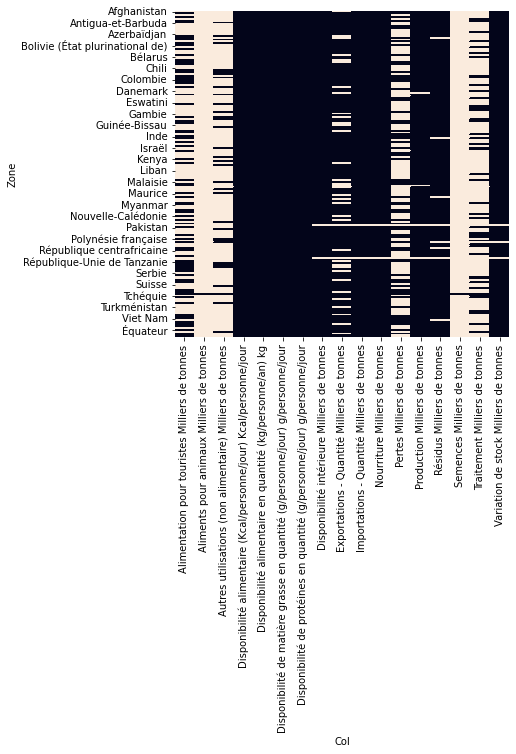

In [4]:
# Concat Élément / Unité
dispo["Col"] = dispo["Élément"] + " " + dispo["Unité"]
# filtre viand de volaile 
dispo = dispo[dispo.Produit == 'Viande de Volailles']
# Selection des colonnes
dispo = dispo.iloc[:,[3,11,14]]
# Pivot table & drop level
dispo = dispo.pivot_table(index=["Zone"], columns="Col", values=["Valeur"], aggfunc=sum)
dispo.columns = dispo.columns.droplevel()
# Aperçue dispo
cl.watch(dispo)

In [5]:
for idx,column in enumerate(dispo.columns):
  print(idx,column)

0 Alimentation pour touristes Milliers de tonnes
1 Aliments pour animaux Milliers de tonnes
2 Autres utilisations (non alimentaire) Milliers de tonnes
3 Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour
4 Disponibilité alimentaire en quantité (kg/personne/an) kg
5 Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour
6 Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour
7 Disponibilité intérieure Milliers de tonnes
8 Exportations - Quantité Milliers de tonnes
9 Importations - Quantité Milliers de tonnes
10 Nourriture Milliers de tonnes
11 Pertes Milliers de tonnes
12 Production Milliers de tonnes
13 Résidus Milliers de tonnes
14 Semences Milliers de tonnes
15 Traitement Milliers de tonnes
16 Variation de stock Milliers de tonnes


In [6]:
dispo = dispo.iloc[:,[3,4,5,6,7,10,9,16,12,13,8,0,11,15,2,1]]

Null DATA and nothing duplicate 

Total missing value 
 
 Col
Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour                  0
Disponibilité alimentaire en quantité (kg/personne/an) kg                          0
Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour      0
Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour           0
Disponibilité intérieure Milliers de tonnes                                        2
Nourriture Milliers de tonnes                                                      2
Importations - Quantité Milliers de tonnes                                         2
Variation de stock Milliers de tonnes                                              3
Production Milliers de tonnes                                                      4
Résidus Milliers de tonnes                                                         8
Exportations - Quantité Milliers de tonnes                                        37
Ali

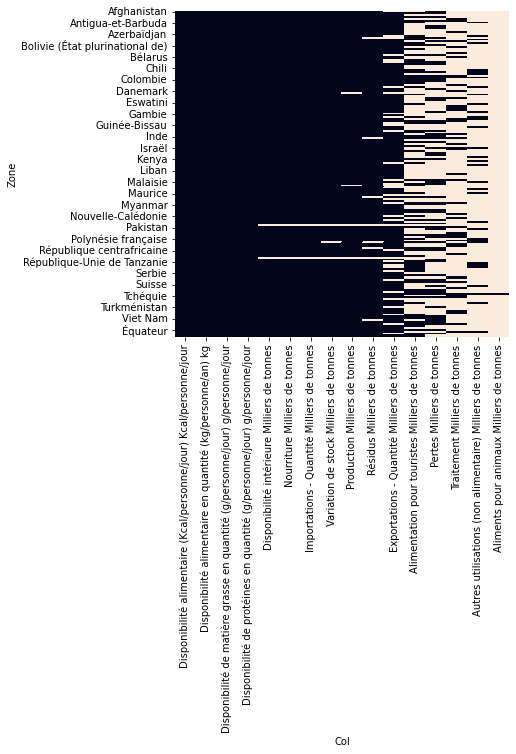

In [7]:
cl.watch(dispo)

In [8]:
for idx,column in enumerate(dispo.columns):
  print(idx,column)

0 Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour
1 Disponibilité alimentaire en quantité (kg/personne/an) kg
2 Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour
3 Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour
4 Disponibilité intérieure Milliers de tonnes
5 Nourriture Milliers de tonnes
6 Importations - Quantité Milliers de tonnes
7 Variation de stock Milliers de tonnes
8 Production Milliers de tonnes
9 Résidus Milliers de tonnes
10 Exportations - Quantité Milliers de tonnes
11 Alimentation pour touristes Milliers de tonnes
12 Pertes Milliers de tonnes
13 Traitement Milliers de tonnes
14 Autres utilisations (non alimentaire) Milliers de tonnes
15 Aliments pour animaux Milliers de tonnes


In [9]:
# data manquante <20%
disp1 = dispo.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
# data manquante >20% & <70% 
disp2 = dispo.iloc[:,[10,11,12]]
# data manquante >70%
disp3 = dispo.iloc[:,[13,14,15]]

################################
# Remplacement nan disp3 par 0
disp3 = disp3.replace(np.nan,0)

################################
# Remplacement nan disp1 par mean
disp13 = disp1.merge(disp3, on="Zone")
# model imputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
i = imputer.fit_transform(disp13)
disp13 = pd.DataFrame(i, columns=disp13.columns, index=disp13.index)

################################
# Remplacement nan disp2 par KNN
dispo = disp13.merge(disp2, on="Zone")
# model imputer
imputer = KNNImputer()
i = imputer.fit_transform(dispo)
dispo = pd.DataFrame(i, columns=dispo.columns, index= dispo.index)

Nettoyage pop

Null DATA and nothing duplicate 

Total missing value 
 
 Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64 

Percentage of missing value 
 
 Code Domaine               0.00
Domaine                    0.00
Code zone                  0.00
Zone                       0.00
Code Élément               0.00
Élément                    0.00
Code Produit               0.00
Produit                    0.00
Code année                 0.00
Année                      0.00
Unité                      0.00
Valeur                     0.00
Symbole                    0.00
Description du

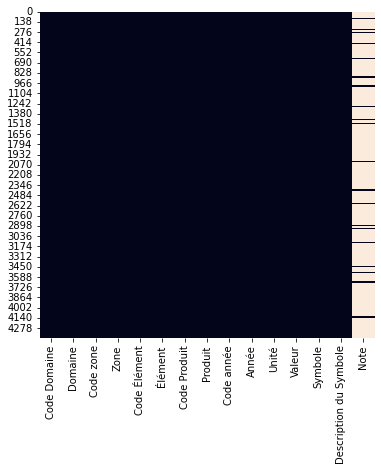

In [10]:
cl.watch(pop)

In [11]:
# Filtre année 2017
pop = pop[pop["Année"]==2017]
# Population en individuelle
pop.Valeur = pop.Valeur * 1000
# Remplacement de Valeur par Population
pop["Population"] = pop.Valeur
# Filtre variable utile
pop = pop.iloc[:,[3,15]]
pop.set_index("Zone", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Nettoyage prod_cost

Null DATA and nothing duplicate 

Total missing value 
 
 Code Domaine                0
Domaine                     0
Code zone (FAO)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Code Mois                   0
Mois                        0
Unité                       0
Valeur                      0
Symbole                   171
Description du Symbole      0
dtype: int64 

Percentage of missing value 
 
 Code Domaine                0.0
Domaine                     0.0
Code zone (FAO)             0.0
Zone                        0.0
Code Élément                0.0
Élément                     0.0
Code Produit                0.0
Produit                     0.0
Code année                  0.0
Année                       0.0
Code Mois                   0.0
Mois                        0.0
Unité                       0.0

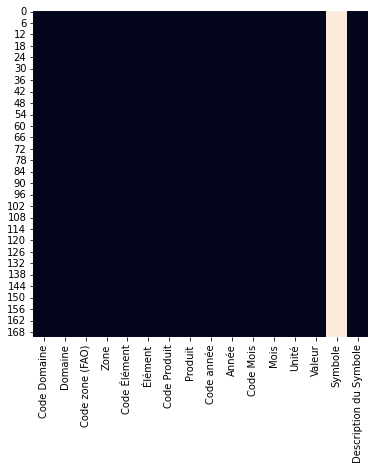

In [12]:
cl.watch(prod_cost)

In [13]:
for idx,column in enumerate(prod_cost.columns):
  print(idx,column)

0 Code Domaine
1 Domaine
2 Code zone (FAO)
3 Zone
4 Code Élément
5 Élément
6 Code Produit
7 Produit
8 Code année
9 Année
10 Code Mois
11 Mois
12 Unité
13 Valeur
14 Symbole
15 Description du Symbole


In [14]:
# Filtre Année 2017
prod_cost = prod_cost[prod_cost["Année"]==2017]
# Remplacement de Valeur par Prix de Production
prod_cost["Prix de Production (USD)"] = prod_cost.Valeur
# Selection des variables utiles
prod_cost = prod_cost.iloc[:,[3,16]]
prod_cost.set_index("Zone", inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## DATA Prep


No duplicate and no null DATA 

Total missing value 
 
 Population                                                                       0
Disponibilité intérieure Milliers de tonnes                                      0
Nourriture Milliers de tonnes                                                    0
Importations - Quantité Milliers de tonnes                                       0
Exportations - Quantité Milliers de tonnes                                       0
Pertes Milliers de tonnes                                                        0
Production Milliers de tonnes                                                    0
Prix de Production (USD)                                                         0
Variation de stock Milliers de tonnes                                            0
Traitement Milliers de tonnes                                                    0
Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour                0
Disponibilité alimentaire en qu

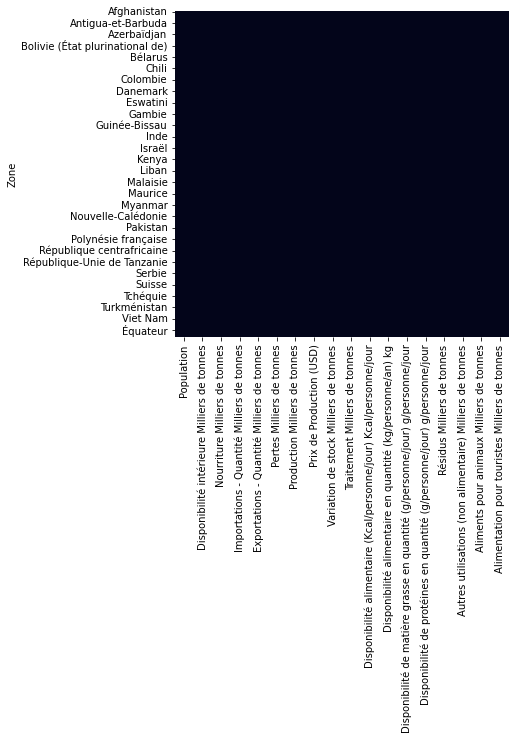

In [15]:
# Merge dispo & pop
df = dispo.merge(pop, on="Zone", how="left")
# Merge df & prod_cost
df = df.merge(prod_cost, on="Zone", how="left")
df = df.replace(np.nan,0)
# Apperçue du df
df = df.iloc[:,[16, 4, 5, 6, 13, 15, 8, 17, 7, 10, 0, 1, 2, 3, 9, 11, 12, 14]]
cl.watch(df)

Ejection des Outliers

In [16]:
X = df.values
# Donnée centré réduite
X = preprocessing.StandardScaler().fit_transform(X)

In [17]:
# model IsolationForest 
model = IsolationForest(contamination=0.03)
# Entrainement du model
model.fit(X)
# Outliers
outliers = model.predict(X)

In [18]:
# DataFrame résultat
outliers = pd.DataFrame(outliers)
outliers = outliers.rename(columns={0:"outliers"})
# Merge df & outliers
df = df.reset_index()
df = pd.merge(df,outliers,left_index=True,right_index=True)
df = df.set_index("Zone")

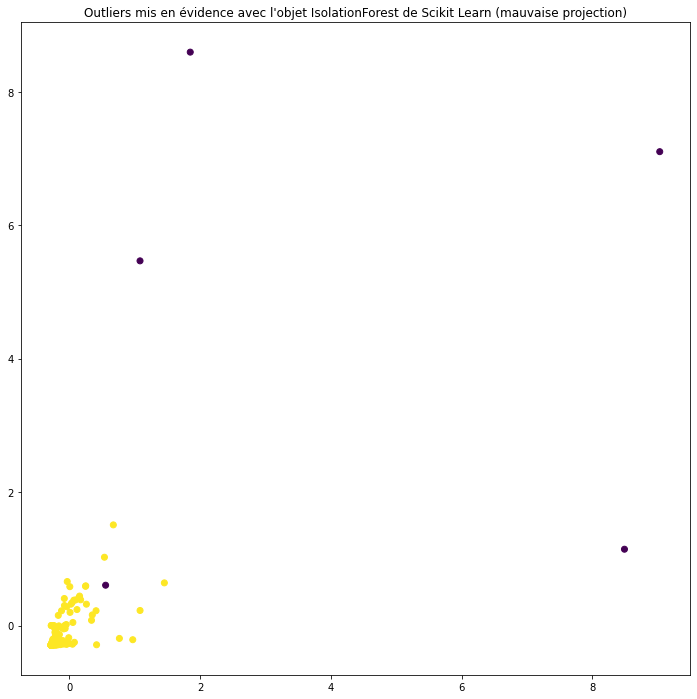

In [19]:
# Visualisation des outliers
plt.figure(figsize=(12,12))
plt.title("Outliers mis en évidence avec l'objet IsolationForest de Scikit Learn (mauvaise projection)")
plt.scatter(X[:,0],X[:,6],c=model.predict(X))
plt.savefig("p9/1.png")

In [20]:
# Affichage des outliers & sauvegarde csv
df_outlier = df[df["outliers"]==-1]
df_outlier.to_csv("p9/liste_des_outliers.csv")
df_outlier

,Population,Disponibilité intérieure Milliers de tonnes,Nourriture Milliers de tonnes,Importations - Quantité Milliers de tonnes,Exportations - Quantité Milliers de tonnes,Pertes Milliers de tonnes,Production Milliers de tonnes,Prix de Production (USD),Variation de stock Milliers de tonnes,Traitement Milliers de tonnes,Disponibilité alimentaire (Kcal/personne/jour) Kcal/personne/jour,Disponibilité alimentaire en quantité (kg/personne/an) kg,Disponibilité de matière grasse en quantité (g/personne/jour) g/personne/jour,Disponibilité de protéines en quantité (g/personne/jour) g/personne/jour,Résidus Milliers de tonnes,Autres utilisations (non alimentaire) Milliers de tonnes,Aliments pour animaux Milliers de tonnes,Alimentation pour touristes Milliers de tonnes,outliers
Zone,,,,,,,,,,,,,,,,,,,
Brésil,2.078338e+08,9982.0,9982.0,3.0,4223.0,333.6,14201.0,0.0,0.0,0.0,204.0,48.03,15.34,15.68,0.0,0.0,0.0,0.0,-1
Chine - RAS de Hong-Kong,7.306322e+06,280.0,391.0,907.0,663.0,2.2,24.0,0.0,-12.0,0.0,210.0,53.51,12.70,22.26,-125.0,32.0,0.0,-18.0,-1
"Chine, continentale",1.421022e+09,18161.0,17518.0,452.0,576.0,643.0,18236.0,1681.4,-50.0,1.0,59.0,12.33,4.67,3.96,-1.0,0.0,0.0,0.0,-1
Inde,1.338677e+09,3661.0,2965.0,0.0,4.0,695.0,3545.0,0.0,-119.0,0.0,7.0,2.22,0.47,0.75,0.0,0.0,0.0,0.0,-1
Japon,1.275027e+08,2415.0,2359.0,1069.0,10.0,56.0,2215.0,0.0,859.0,0.0,67.0,18.50,3.95,7.24,0.0,0.0,0.0,0.0,-1
États-Unis d'Amérique,3.250848e+08,18266.0,18100.0,123.0,3692.0,333.6,21914.0,0.0,80.0,77.0,219.0,55.68,14.83,19.93,0.0,89.0,0.0,0.0,-1


In [21]:
#df sans outliers
df = df[df.outliers==1]
df.drop("outliers",axis=1,inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(166, 18)

Tri dans les variable

In [22]:
# Preprocessing
X = df.values
name = df.index
variable = df.columns
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [23]:
# Première analyse en composante principale avec un object PCA à ncluster max (18)
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [24]:
# Création dataframe de mes variances
variance = pd.DataFrame({"Variable": variable,
                         "Variance Expliqué": pca.explained_variance_,
                         "% Variance Expliqué": pca.explained_variance_ratio_*100,
                         "% Variance Expliqué Cumulée": np.cumsum(pca.explained_variance_ratio_)*100
                        })

In [25]:
# Visualisation de la variance
variance.set_index("Variable", inplace=True)
variance

,Variance Expliqué,% Variance Expliqué,% Variance Expliqué Cumulée
Variable,,,
Population,5.320721,31.109813,31.109813
Disponibilité intérieure Milliers de tonnes,3.948391,23.085915,54.195728
Nourriture Milliers de tonnes,1.981832,11.587608,65.783336
Importations - Quantité Milliers de tonnes,1.300302,7.602760,73.386096
Exportations - Quantité Milliers de tonnes,1.023770,5.985895,79.371992
Pertes Milliers de tonnes,0.976088,5.707108,85.079100
Production Milliers de tonnes,0.790010,4.619121,89.698221
Prix de Production (USD),0.719363,4.206058,93.904279
Variation de stock Milliers de tonnes,0.527207,3.082535,96.986813


In [26]:
# Je garde seulement 99% de ma variance expliqué cumulée
spr = variance[variance["% Variance Expliqué Cumulée"]>99]
df = df.drop(spr.index, axis=1)
variance = variance.drop(spr.index, axis=0)
df

,Population,Disponibilité intérieure Milliers de tonnes,Nourriture Milliers de tonnes,Importations - Quantité Milliers de tonnes,Exportations - Quantité Milliers de tonnes,Pertes Milliers de tonnes,Production Milliers de tonnes,Prix de Production (USD),Variation de stock Milliers de tonnes,Traitement Milliers de tonnes
Zone,,,,,,,,,,
Afghanistan,36296113.0,57.0,55.0,29.0,0.2,2.0,28.0,0.0,0.0,0.0
Afrique du Sud,57009756.0,2118.0,2035.0,514.0,63.0,83.0,1667.0,2015.1,0.0,0.0
Albanie,2884169.0,47.0,47.0,38.0,0.0,0.4,13.0,0.0,4.0,0.0
Algérie,41389189.0,277.0,264.0,2.0,0.0,13.0,275.0,2180.7,0.0,0.0
Allemagne,82658409.0,1739.0,1609.0,842.0,646.0,66.8,1514.0,1459.6,-29.0,167.0
...,...,...,...,...,...,...,...,...,...,...
Égypte,96442591.0,1250.0,1250.0,110.0,1.0,61.8,1118.0,1510.5,-23.0,0.0
Émirats arabes unis,9487203.0,412.0,412.0,433.0,94.0,5.4,48.0,0.0,-26.0,0.0
Équateur,16785361.0,341.0,324.0,0.0,0.0,17.0,340.0,0.0,-1.0,0.0


## ACP

In [27]:
# Preprocessing
X = df.values
name = df.index
variable = df.columns
X_scaled = preprocessing.StandardScaler().fit_transform(X)
# Première analyse en composante principale avec un object PCA à ncluster max (10)
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [28]:
# Update dataframe de mes variances
variance = pd.DataFrame({"Variable": variable,
                         "Variance Expliqué": pca.explained_variance_,
                         "% Variance Expliqué": pca.explained_variance_ratio_*100,
                         "% Variance Expliqué Cumulée": np.cumsum(pca.explained_variance_ratio_)*100
                        })
variance.set_index("Variable", inplace=True)
variance

,Variance Expliqué,% Variance Expliqué,% Variance Expliqué Cumulée
Variable,,,
Population,4.862737,48.334430,48.334430
Disponibilité intérieure Milliers de tonnes,1.235232,12.277906,60.612335
Nourriture Milliers de tonnes,1.123871,11.171012,71.783347
Importations - Quantité Milliers de tonnes,1.015771,10.096518,81.879865
Exportations - Quantité Milliers de tonnes,0.812409,8.075149,89.955014
Pertes Milliers de tonnes,0.444057,4.413822,94.368836
Production Milliers de tonnes,0.361350,3.591732,97.960568
Prix de Production (USD),0.199372,1.981708,99.942276
Variation de stock Milliers de tonnes,0.004656,0.046281,99.988557


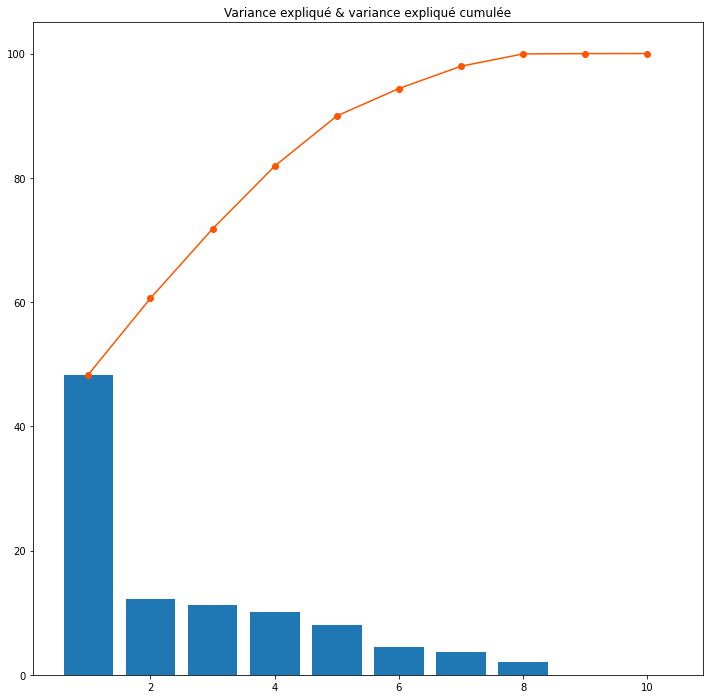

In [29]:
plt.figure(figsize= [12,12])
plt.title("Variance expliqué & variance expliqué cumulée")
plt.bar(np.arange(len(variance["% Variance Expliqué"]))+1, variance["% Variance Expliqué"])
plt.plot(np.arange(len(variance["% Variance Expliqué Cumulée"]))+1, variance["% Variance Expliqué Cumulée"], c="#FF5400", marker="o")
plt.savefig("p9/2.png")

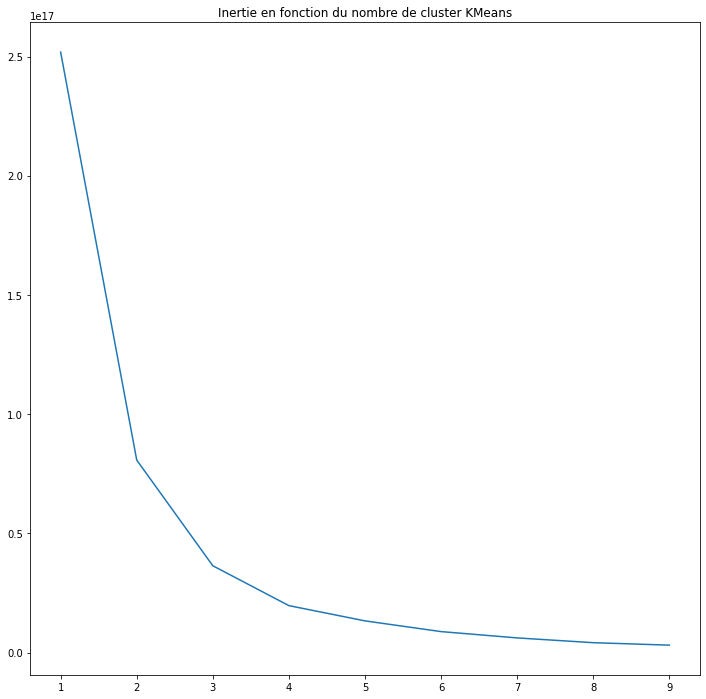

In [30]:
# Mon graphique à plus de coude que de bras, je vais donc accentué la cassure 
inertia = []
K_range = range(1,10)
for k in K_range:
  model = KMeans(n_clusters=k).fit(X)
  inertia.append(model.inertia_)
plt.figure(figsize=(12,12))
plt.title("Inertie en fonction du nombre de cluster KMeans")
plt.plot(K_range,inertia)
plt.savefig("p9/3.png")

In [31]:
# Analyse en composante principale avec un object PCA à ncluster 4
n_comp = 4
pca= decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

In [32]:
 # Fonction qui me permet d'afficher mes cercles de corrélations

# ---------- PROVIENT DU COURS D'OPENCLASSROOMS
# https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None, color="orange", save_name=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(12,12))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color=color)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.savefig(save_name+"_Cercle des corrélations (F{} et F{}).png".format(d1+1, d2+1))
            plt.show(block=False)

# Fonction qui me permet d'afficher mes projection sur des plans factorielle            

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, save_name=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,12))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig(save_name+"_Projection des individus (sur F{} et F{}).png".format(d1+1, d2+1))
            plt.show(block=False)

In [33]:
pcs = pca.components_
composante = pd.DataFrame(pcs, columns=df.columns, index=["F"+str(i+1) for i in range(4)])
composante2 = composante*composante
composante

,Population,Disponibilité intérieure Milliers de tonnes,Nourriture Milliers de tonnes,Importations - Quantité Milliers de tonnes,Exportations - Quantité Milliers de tonnes,Pertes Milliers de tonnes,Production Milliers de tonnes,Prix de Production (USD),Variation de stock Milliers de tonnes,Traitement Milliers de tonnes
F1,0.326918,0.439440,0.431882,0.280601,0.192901,0.380263,0.434996,0.008384,0.052621,0.246753
F2,-0.164273,-0.175053,-0.163553,0.221701,0.720479,-0.253582,-0.023027,-0.196420,0.329313,0.368128
F3,-0.140383,0.061214,0.054175,-0.330614,-0.006245,0.133023,0.179077,0.169035,0.819486,-0.338190
F4,-0.193127,-0.004567,0.006666,0.287703,0.113739,-0.075063,-0.049200,0.923485,-0.074255,0.023120


In [34]:
# Connaître la composante pricipale pour chaque variable
def dernierIndiceMaximum(liste):
    maxi = liste[0]
    longueur=len(liste)
    indice_max = 0
    for i in range(longueur):
        if liste[i] >= maxi:
            maxi = liste[i]
            indice_max = i
    return indice_max

# Gestion des couleur des composantes
c = []
comp = []
for i in composante2.columns:
  c.append(dernierIndiceMaximum(composante2[i]))
  comp.append([dernierIndiceMaximum(composante2[i])+1,i])

c = ["#f72585"if elem == 0 else elem for elem in c]
c = ["#7209b7"if elem == 1 else elem for elem in c]
c = ["#3a0ca3"if elem == 2 else elem for elem in c]
c = ["#4361ee"if elem == 3 else elem for elem in c]

In [35]:
# Affectation des variable par rapport aux composantes
comp.sort()
comp

[[1, 'Disponibilité intérieure Milliers de tonnes'],
 [1, 'Nourriture Milliers de tonnes'],
 [1, 'Pertes Milliers de tonnes'],
 [1, 'Population'],
 [1, 'Production Milliers de tonnes'],
 [2, 'Exportations - Quantité Milliers de tonnes'],
 [2, 'Traitement Milliers de tonnes'],
 [3, 'Importations - Quantité Milliers de tonnes'],
 [3, 'Variation de stock Milliers de tonnes'],
 [4, 'Prix de Production (USD)']]

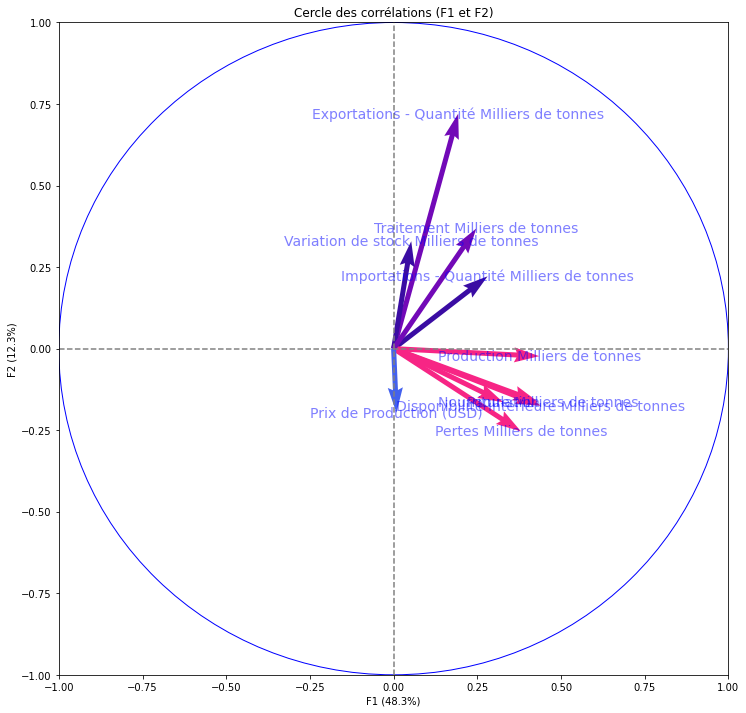

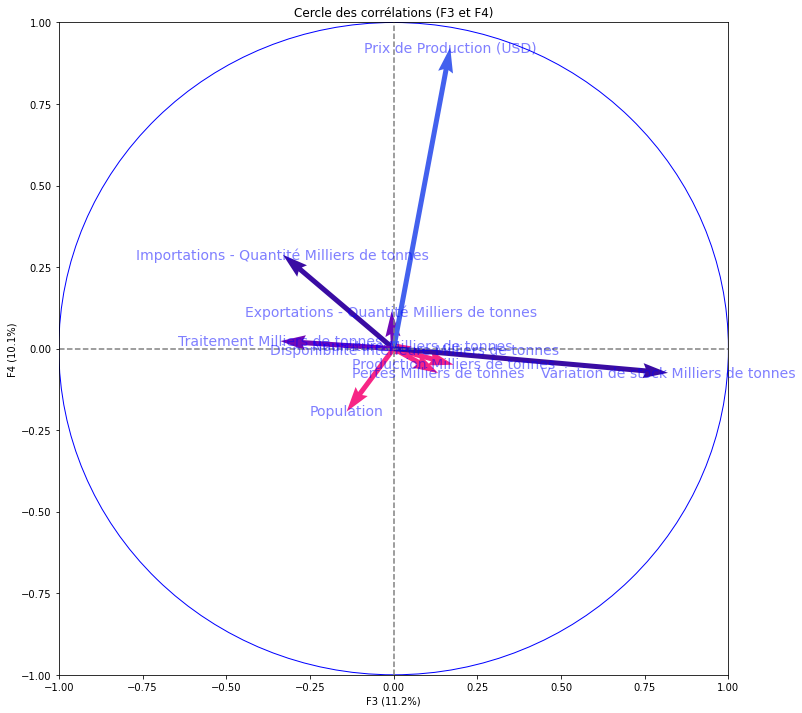

In [36]:
# Cercle des corrélations
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels= np.array(variable), color=c, save_name="p9/4")

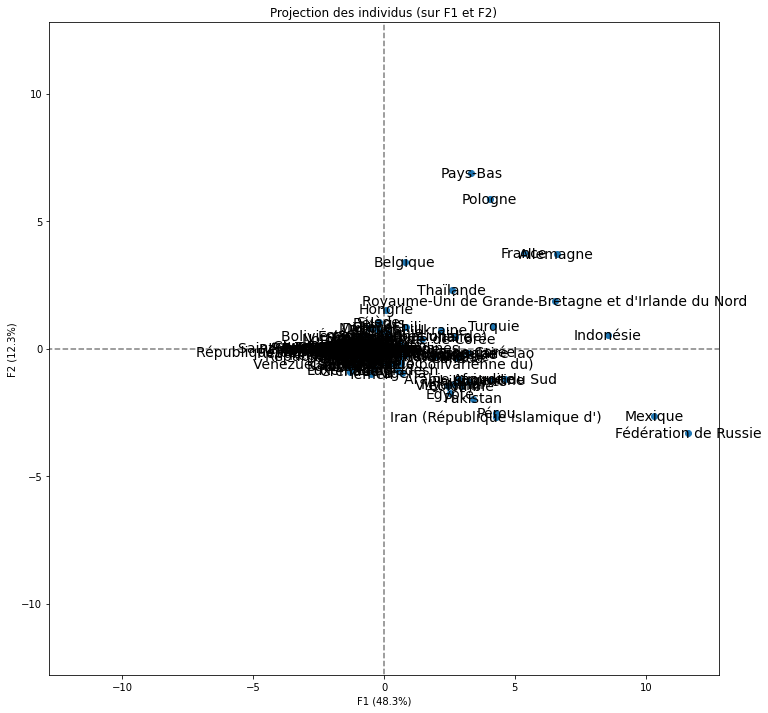

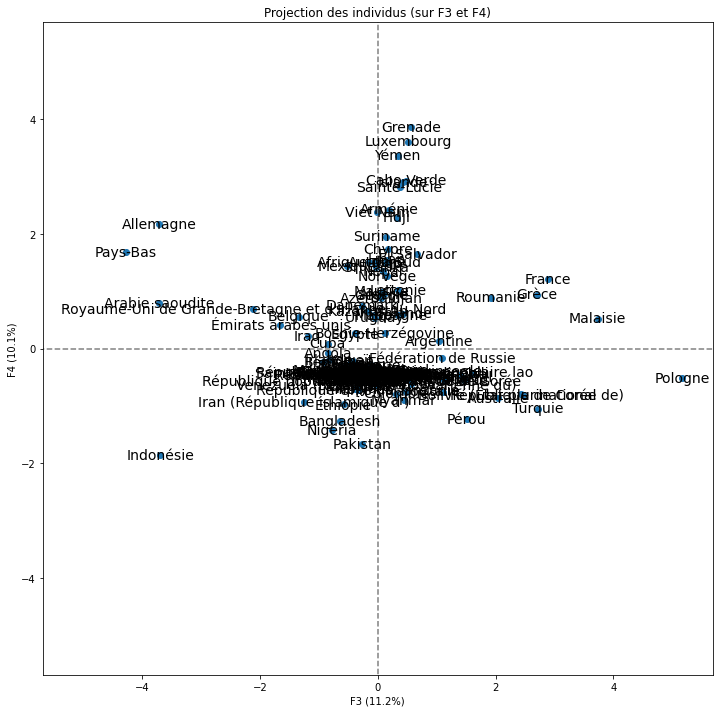

In [37]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], np.array(name), save_name="p9/5")

## Classification Ascendante Hierachique

Dendrogramme

In [38]:
y = df.index
Z = linkage(X_scaled, method="ward", metric="euclidean")

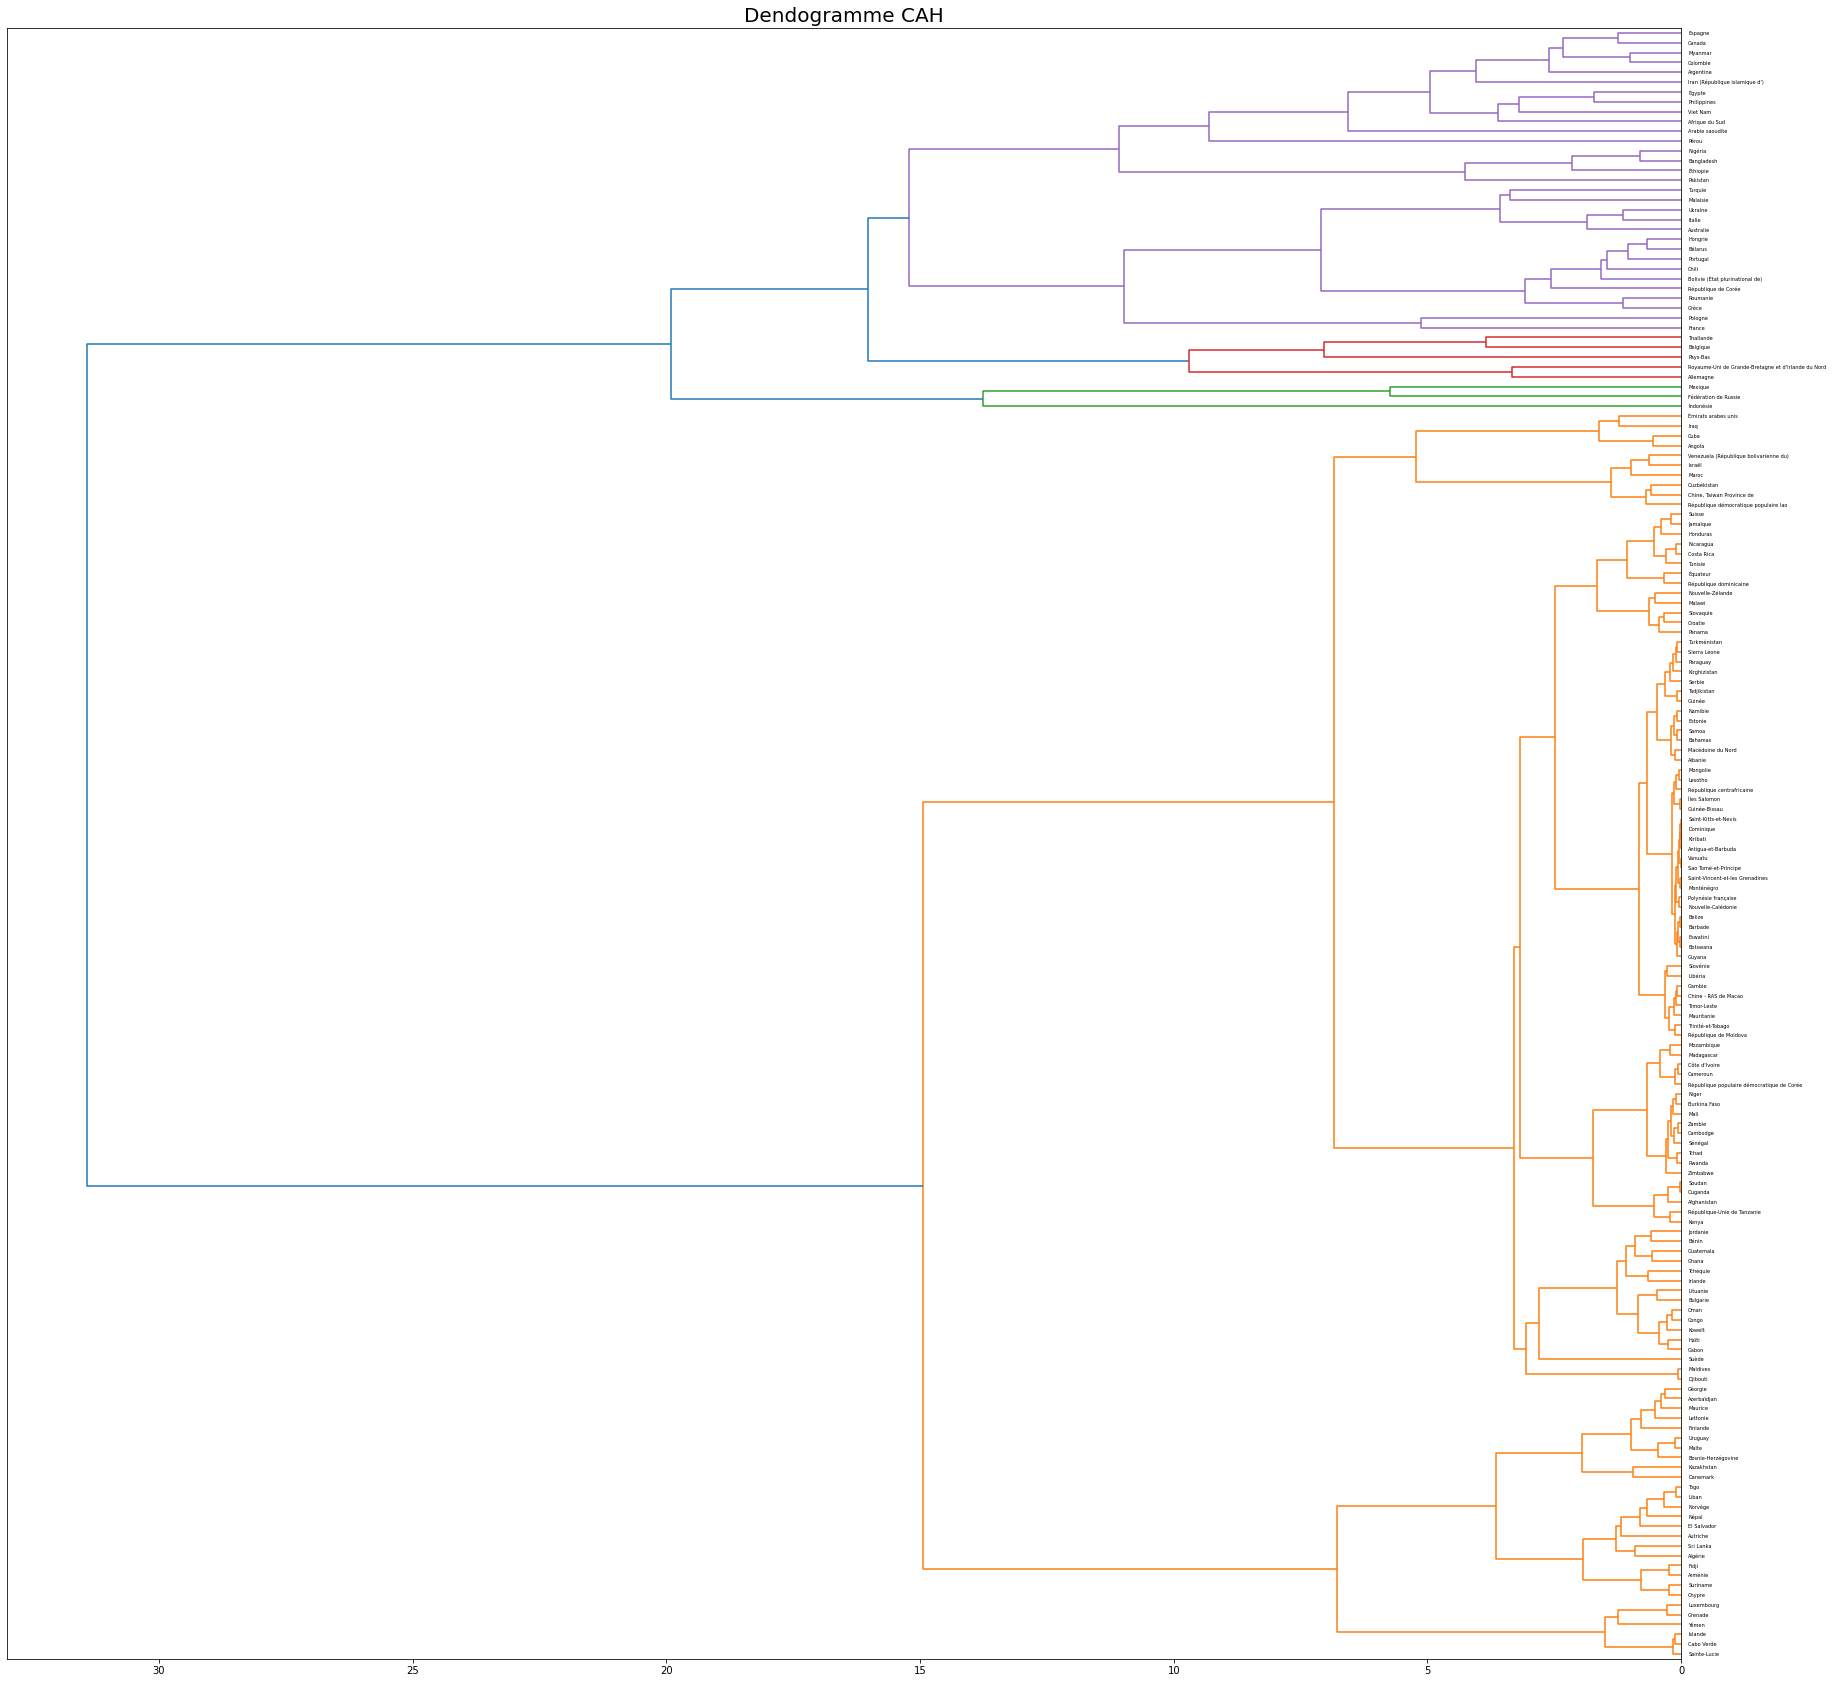

In [39]:
plt.figure(figsize=(30,30))
plt.title("Dendogramme CAH", fontsize=20)
dendrogram(Z, labels=y, orientation="left", color_threshold=16)
plt.savefig("p9/6.png")

In [40]:
clusters = fcluster(Z, 4, criterion='maxclust')


Clustermap

In [41]:
# Je crée un df pour faire ma clustermap
df_scaled = pd.DataFrame(X_scaled, columns=df.columns.tolist(), index=df.index)
df_cah = df_scaled

In [42]:
df_cah["CAH"] = clusters
df["CAH"] = clusters
df_cah = df_cah.groupby("CAH").agg(["mean"])
df_scaled.drop("CAH", axis = 1, inplace=True)
df_cah

,Population,Disponibilité intérieure Milliers de tonnes,Nourriture Milliers de tonnes,Importations - Quantité Milliers de tonnes,Exportations - Quantité Milliers de tonnes,Pertes Milliers de tonnes,Production Milliers de tonnes,Prix de Production (USD),Variation de stock Milliers de tonnes,Traitement Milliers de tonnes
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
CAH,,,,,,,,,,
1,-0.350569,-0.393923,-0.386418,-0.237118,-0.255235,-0.354335,-0.418615,0.007774,-0.178532,-0.177980
2,3.968567,4.716169,4.666566,2.053522,-0.081092,3.859428,4.282114,0.387399,-0.532244,3.711693
3,0.658899,0.971868,0.977901,2.780747,4.113882,0.501529,1.345179,-0.252578,-0.922130,2.439339
4,0.945871,1.000659,0.973740,0.324182,0.389958,0.997244,1.083608,-0.028599,0.931645,-0.023495


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1080 with 0 Axes>

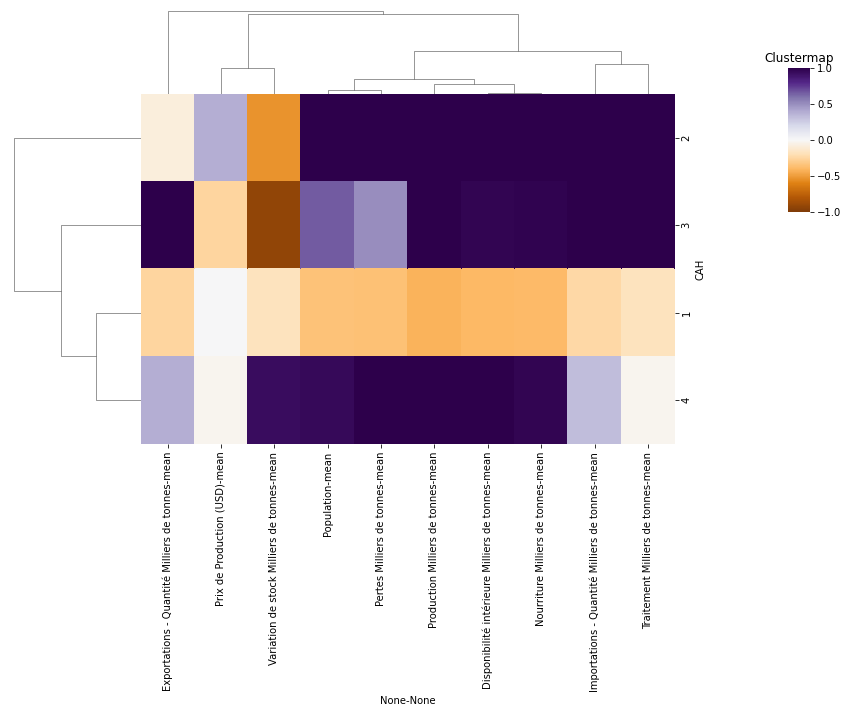

In [43]:
plt.figure(figsize=(18,15))
sns.clustermap(df_cah, cmap="PuOr", linecolor="black", vmin = -1, vmax=1,cbar_pos=(1.1, 0.7 , 0.03, 0.2))
plt.title("Clustermap")
plt.savefig("p9/7.png")
plt.show

Projection des individus avec cluster 

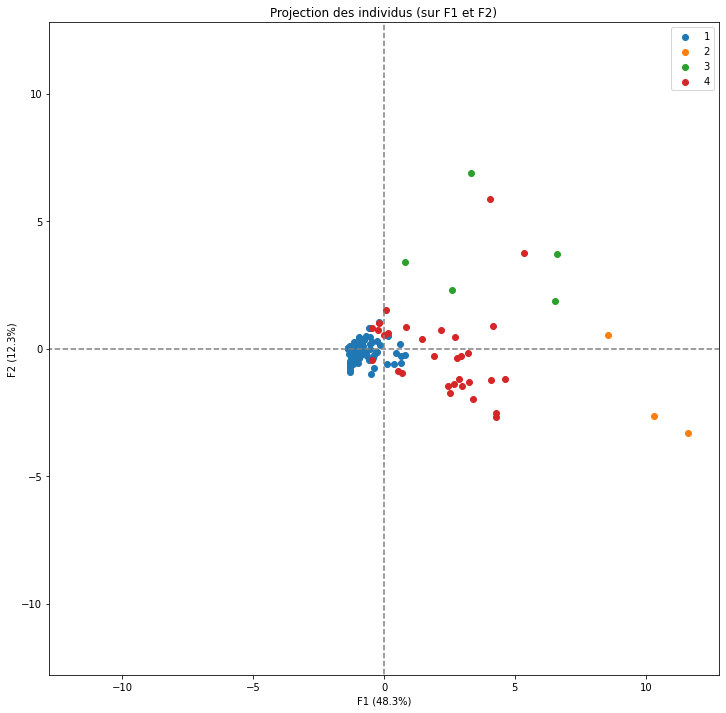

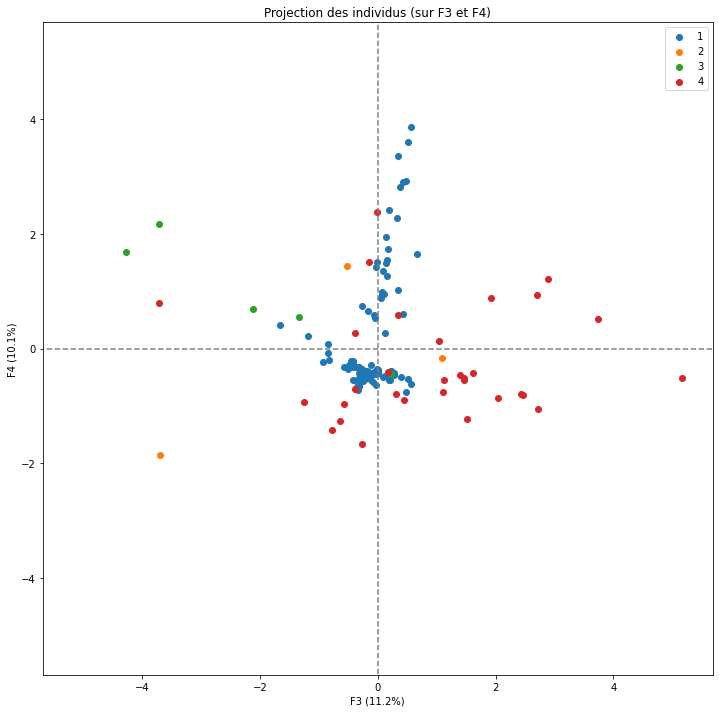

In [44]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels=None, illustrative_var=clusters, save_name="p9/8")
plt.show()

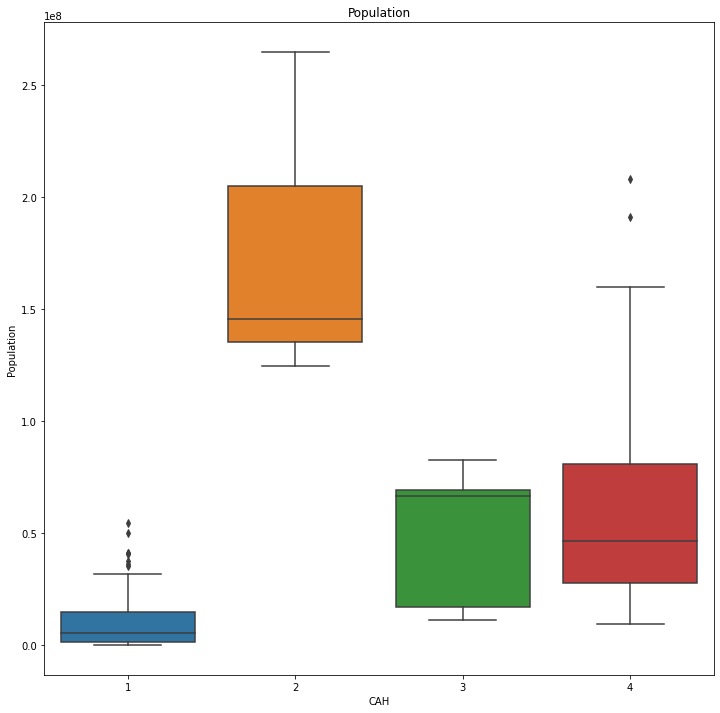

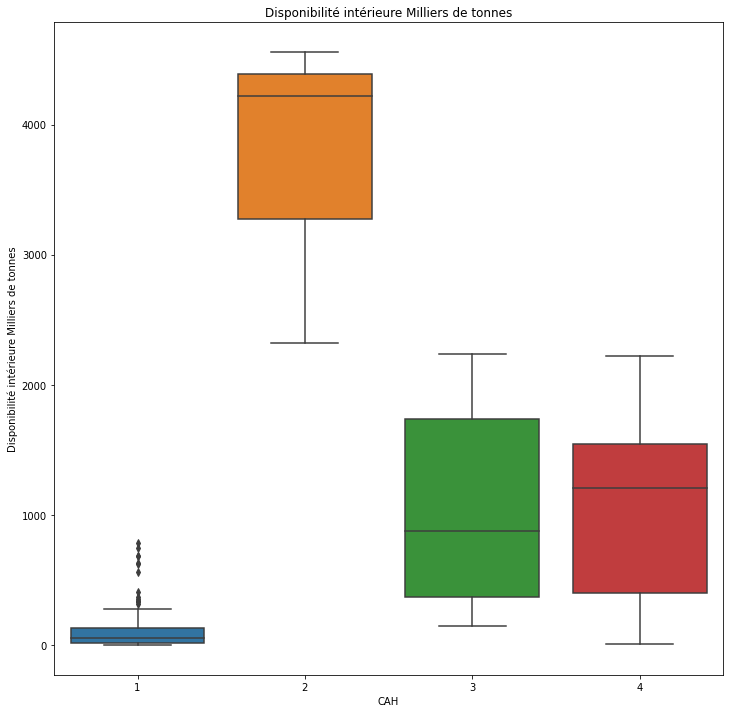

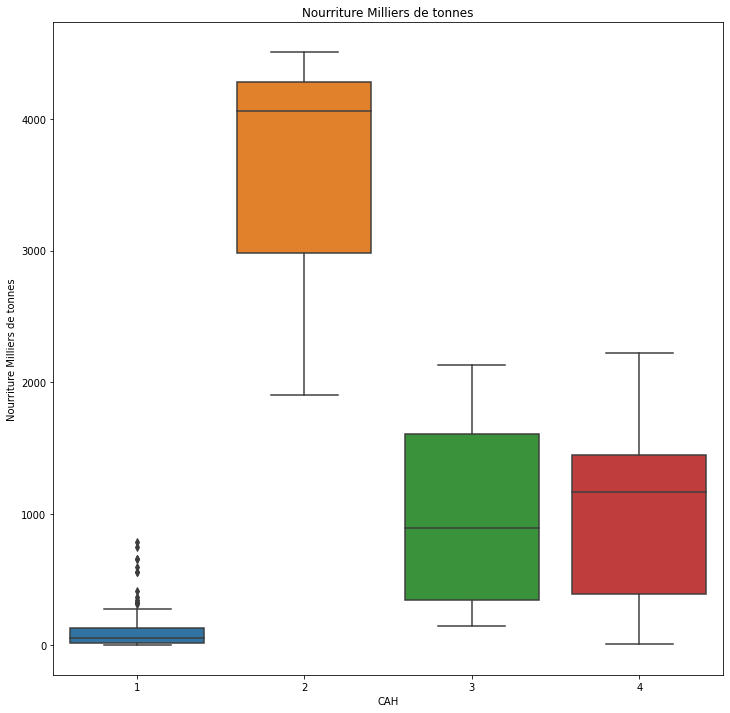

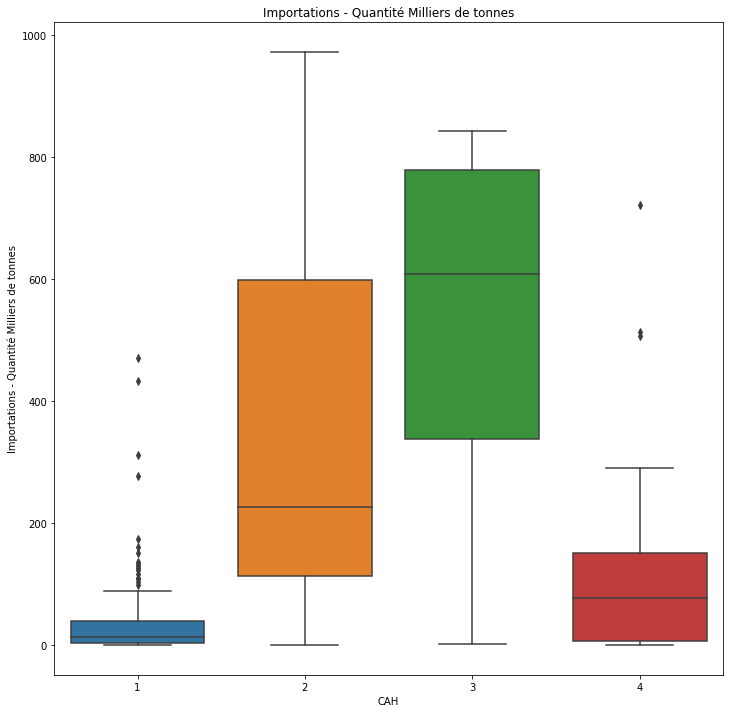

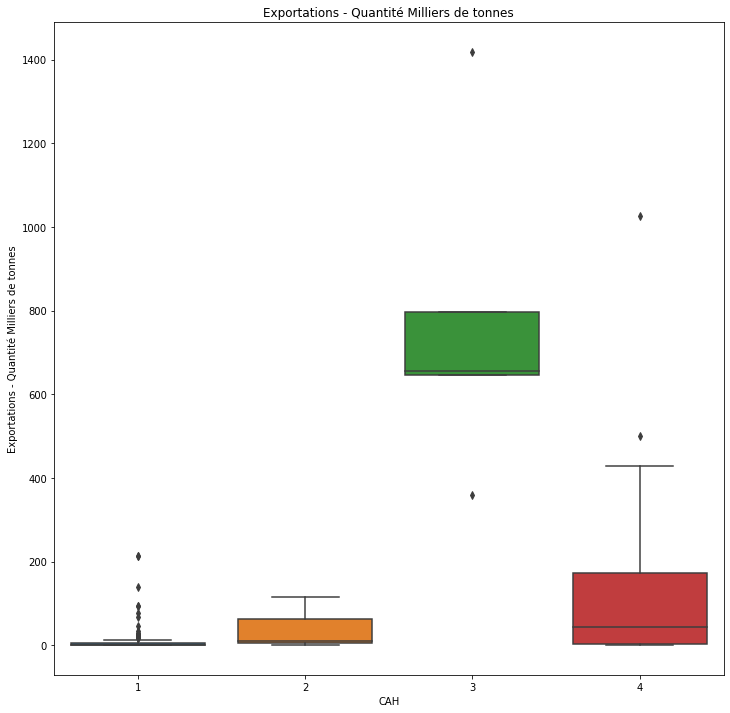

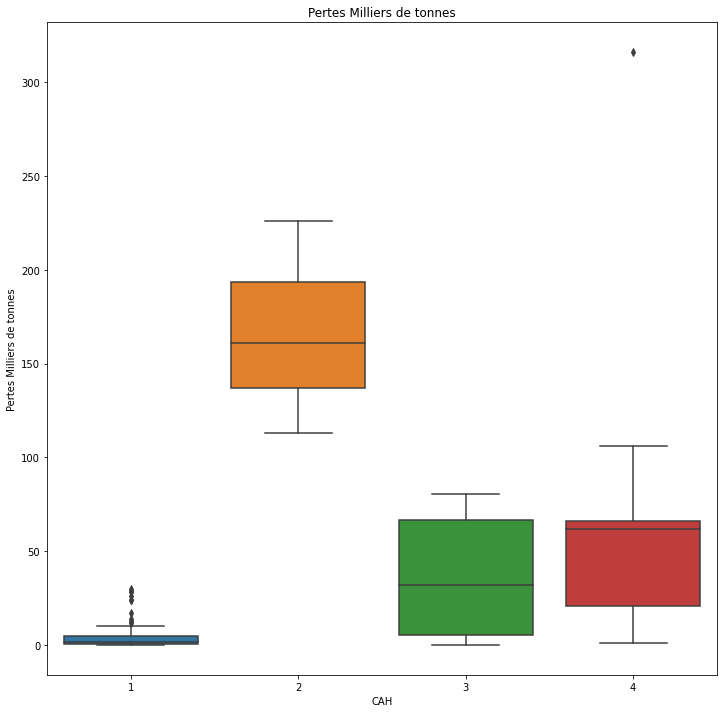

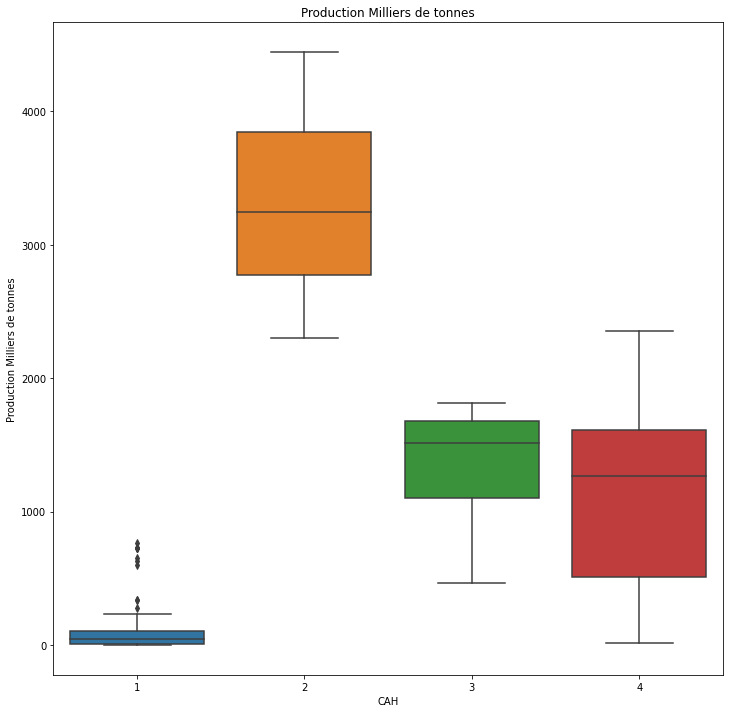

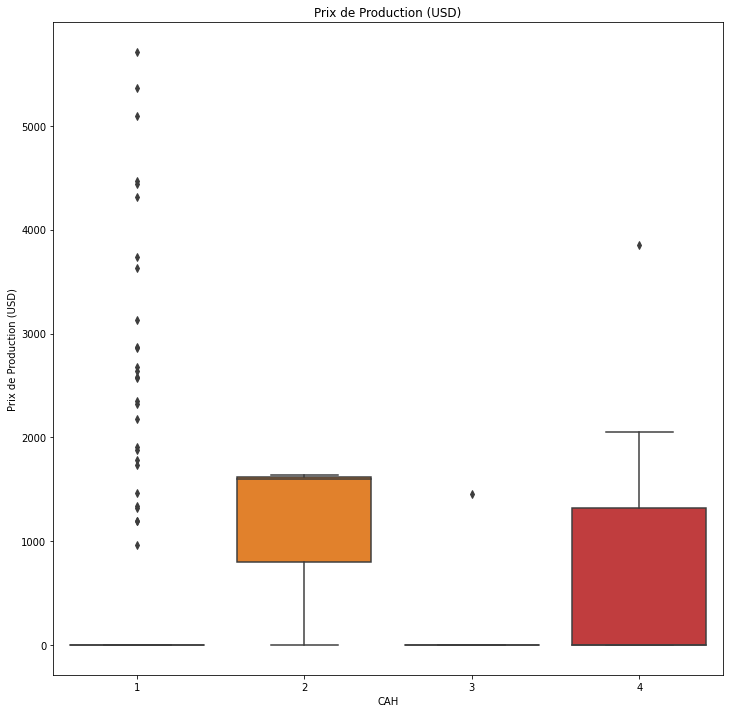

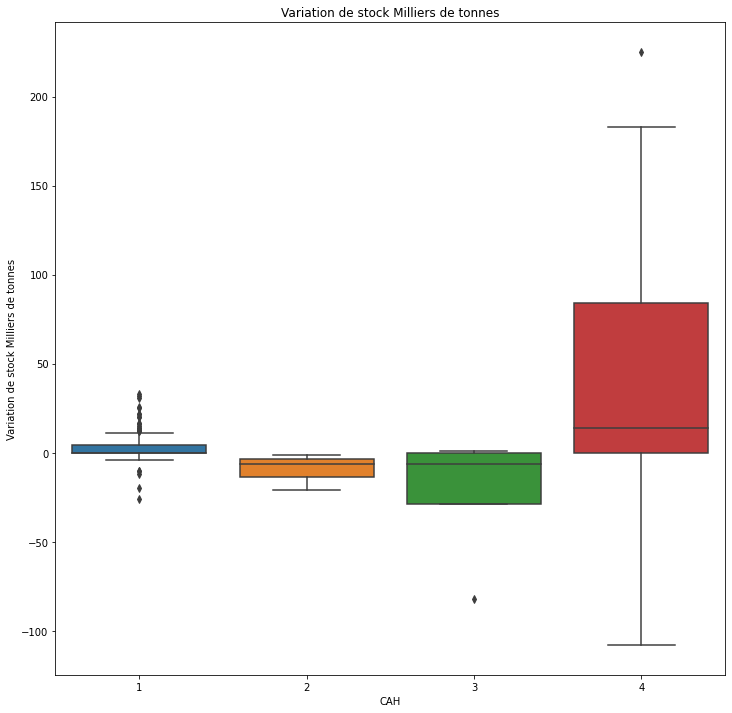

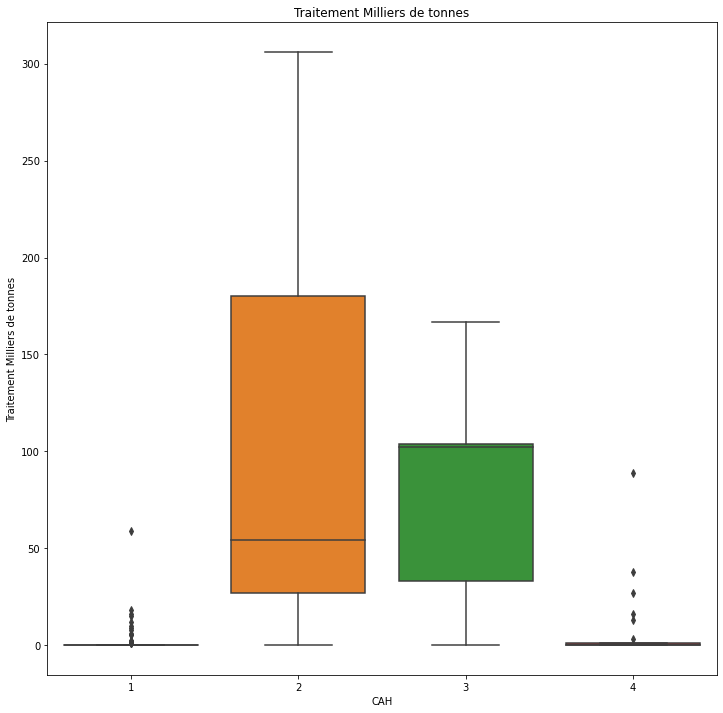

In [45]:
# Algo pour sortir tous mes boxplot

for i in range(len(variance.index.tolist())):
  plt.figure(figsize=(12,12))
  plt.title(variance.index[i])
  sns.boxplot(data=df, x=df.CAH, y=variance.index[i])
  plt.savefig(f'p9/9 {variance.index[i]}.png')
  plt.show()

# KMeans

In [46]:
cluster = KMeans(n_clusters=n_comp).fit(X_scaled)
cluster_kmeans = cluster.labels_
X_projection = pca.transform(X_scaled)
X_projection

centre = cluster.cluster_centers_
centre_projection = pca.transform(centre)

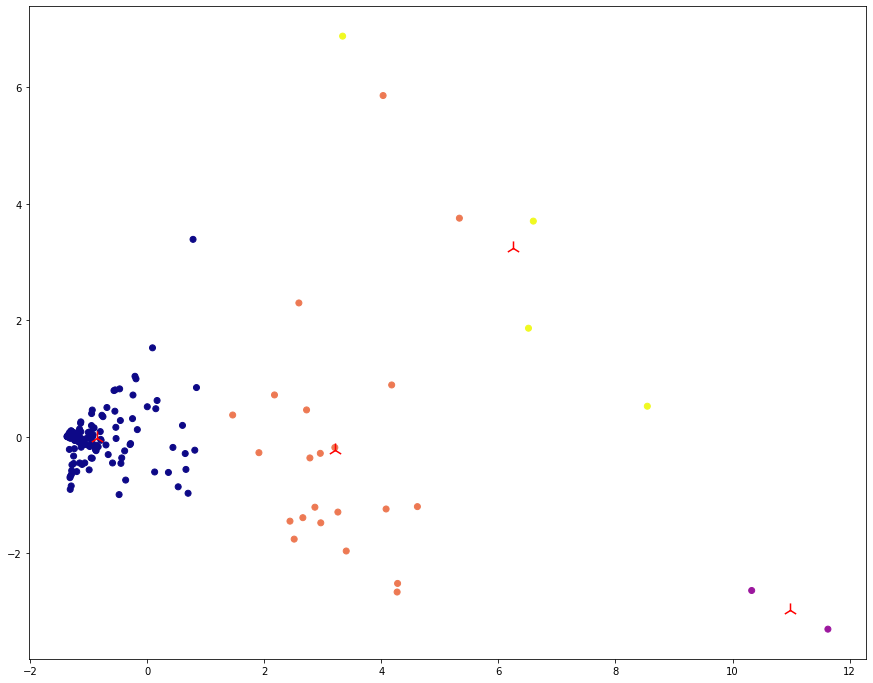

In [47]:
plt.figure(figsize=(15,12))
plt.scatter(X_projection[:,0], X_projection[:,1], c=cluster_kmeans, cmap="plasma")
plt.scatter(centre_projection[:,0], centre_projection[:,1], c="red", marker="2", s=200)
plt.savefig("p9/10.png")

In [48]:
df["KMeans"] = cluster.labels_

In [49]:
df

,Population,Disponibilité intérieure Milliers de tonnes,Nourriture Milliers de tonnes,Importations - Quantité Milliers de tonnes,Exportations - Quantité Milliers de tonnes,Pertes Milliers de tonnes,Production Milliers de tonnes,Prix de Production (USD),Variation de stock Milliers de tonnes,Traitement Milliers de tonnes,CAH,KMeans
Zone,,,,,,,,,,,,
Afghanistan,36296113.0,57.0,55.0,29.0,0.2,2.0,28.0,0.0,0.0,0.0,1,0
Afrique du Sud,57009756.0,2118.0,2035.0,514.0,63.0,83.0,1667.0,2015.1,0.0,0.0,4,2
Albanie,2884169.0,47.0,47.0,38.0,0.0,0.4,13.0,0.0,4.0,0.0,1,0
Algérie,41389189.0,277.0,264.0,2.0,0.0,13.0,275.0,2180.7,0.0,0.0,1,0
Allemagne,82658409.0,1739.0,1609.0,842.0,646.0,66.8,1514.0,1459.6,-29.0,167.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Égypte,96442591.0,1250.0,1250.0,110.0,1.0,61.8,1118.0,1510.5,-23.0,0.0,4,2
Émirats arabes unis,9487203.0,412.0,412.0,433.0,94.0,5.4,48.0,0.0,-26.0,0.0,1,0
Équateur,16785361.0,341.0,324.0,0.0,0.0,17.0,340.0,0.0,-1.0,0.0,1,0


Clustermap

In [50]:
# Je crée un df pour faire ma clustermap
df_kmeans = df_scaled
df_kmeans["KMeans"] = cluster.labels_
df_kmeans = df_kmeans.groupby("KMeans").agg(["mean"])

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1080 with 0 Axes>

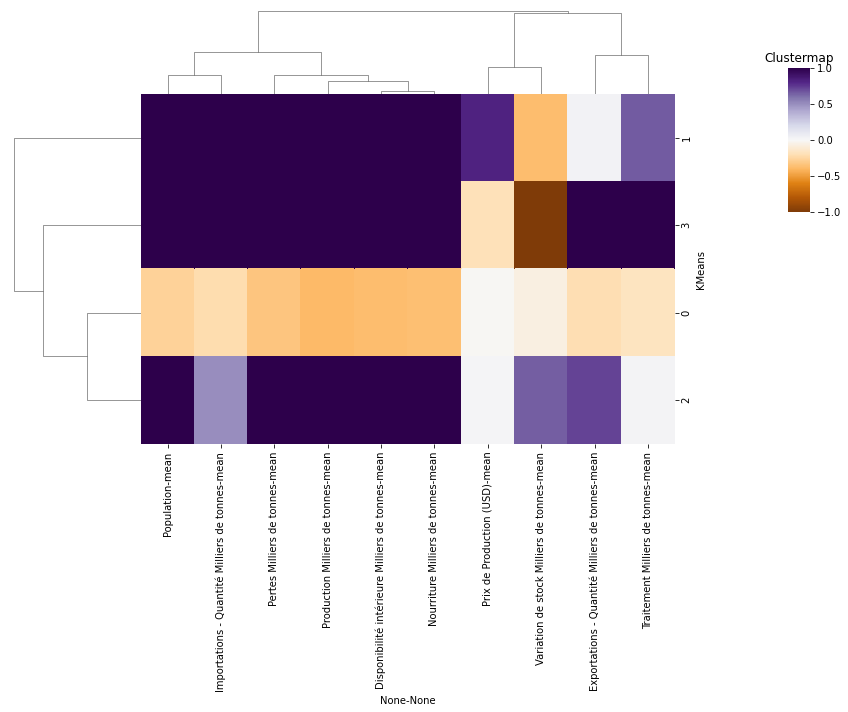

In [51]:
plt.figure(figsize=(18,15))
sns.clustermap(df_kmeans, cmap="PuOr", linecolor="black", vmin = -1, vmax=1,cbar_pos=(1.1, 0.7 , 0.03, 0.2))
plt.title("Clustermap")
plt.savefig("p9/11.png")
plt.show

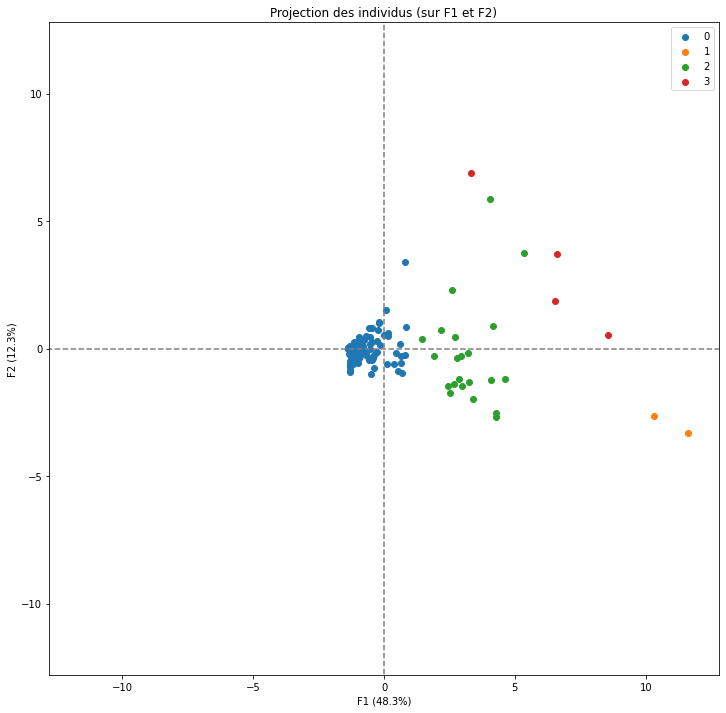

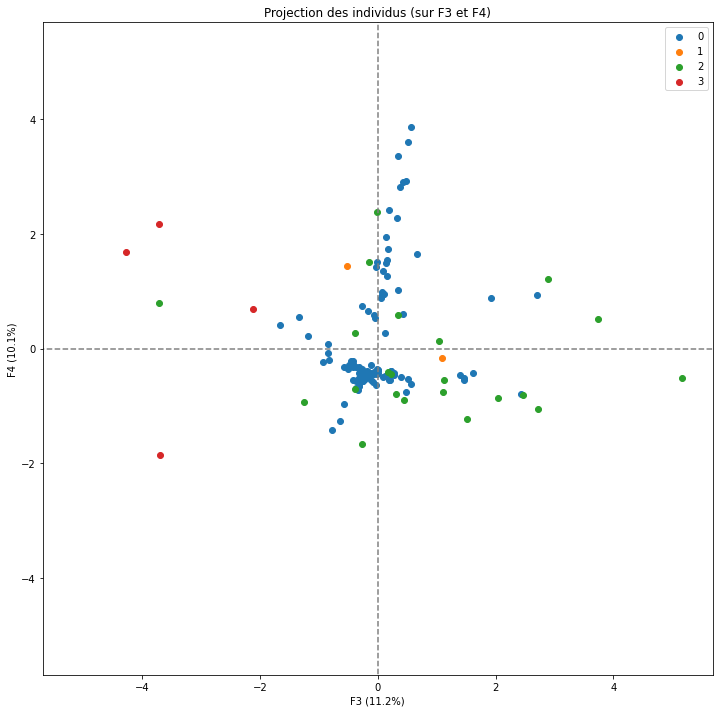

In [52]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels=None, illustrative_var=df.KMeans, save_name="p9/12")
plt.show()

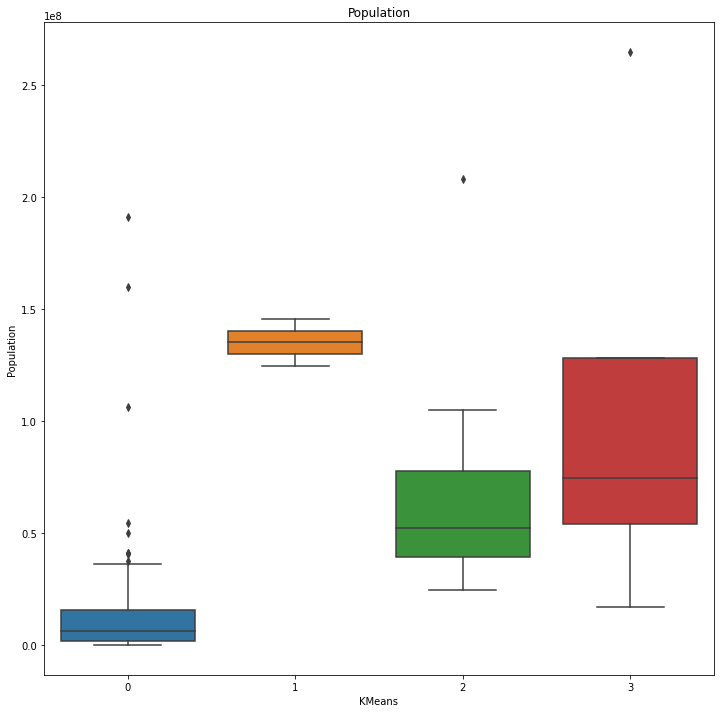

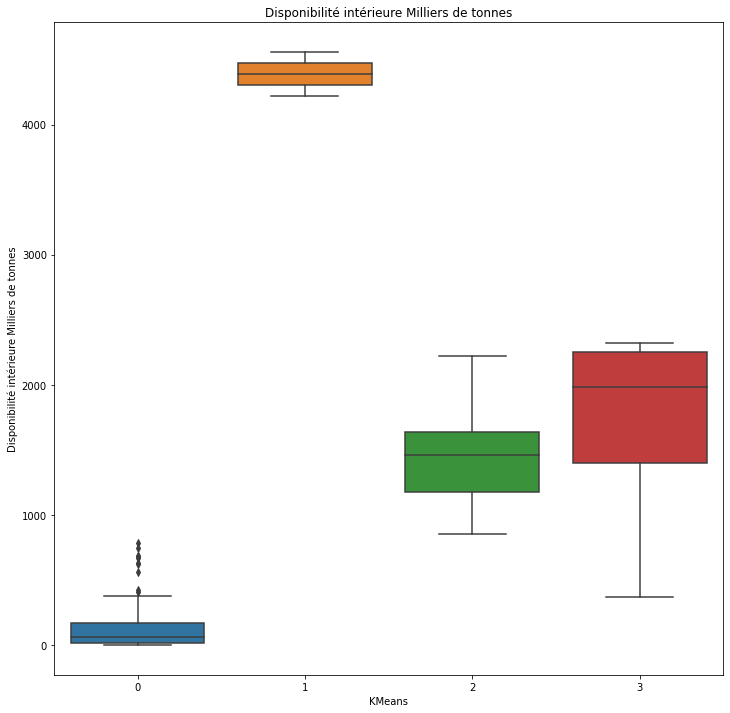

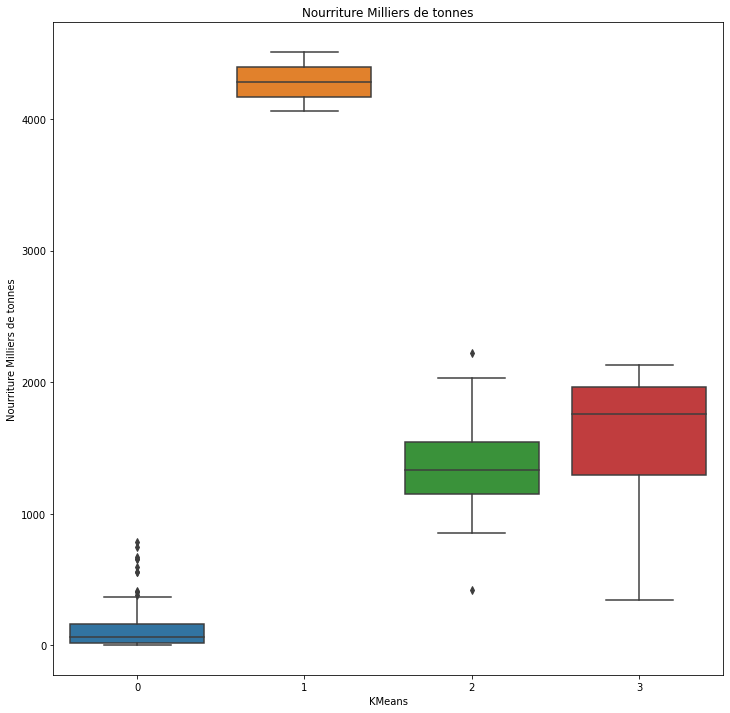

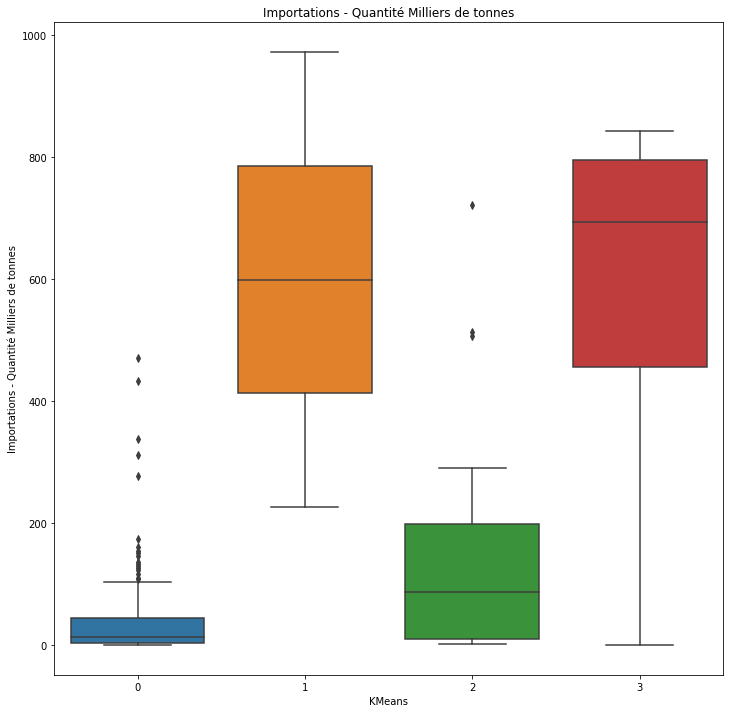

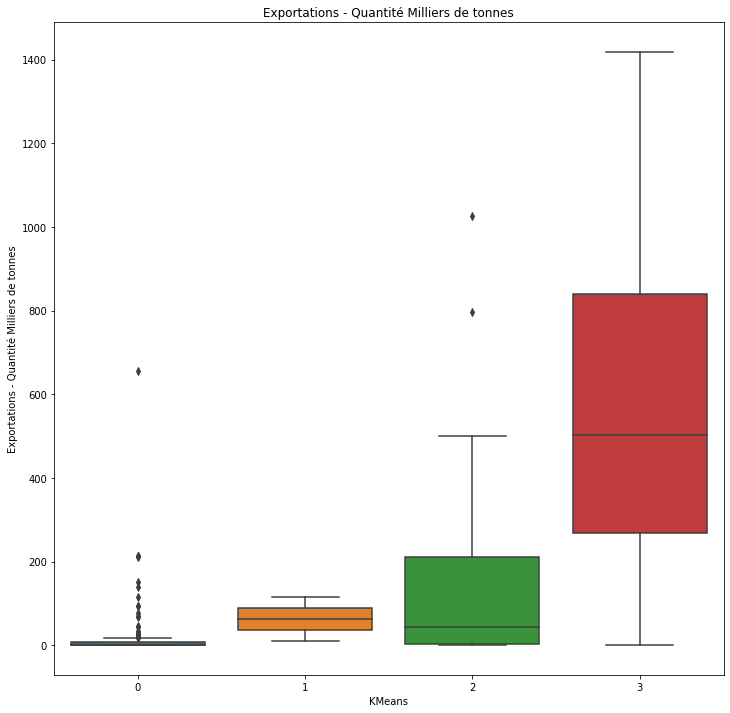

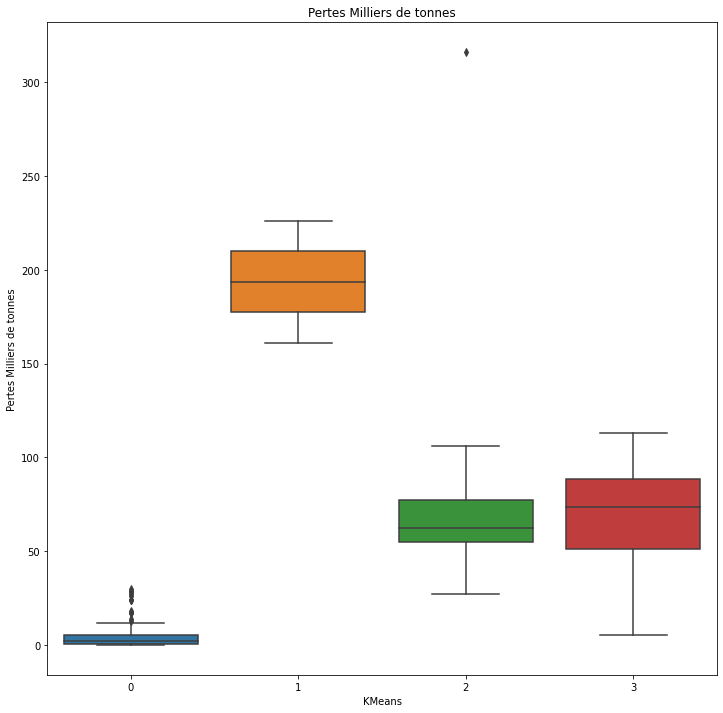

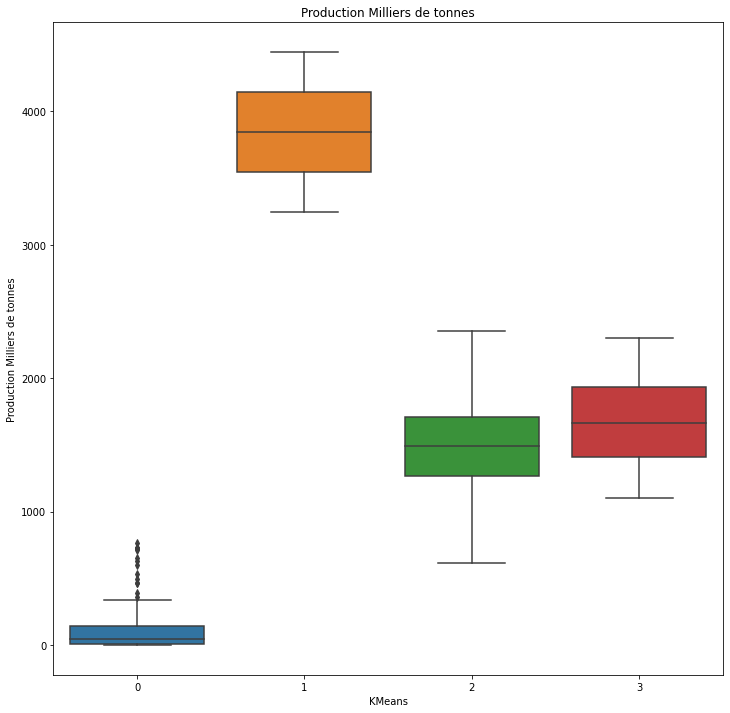

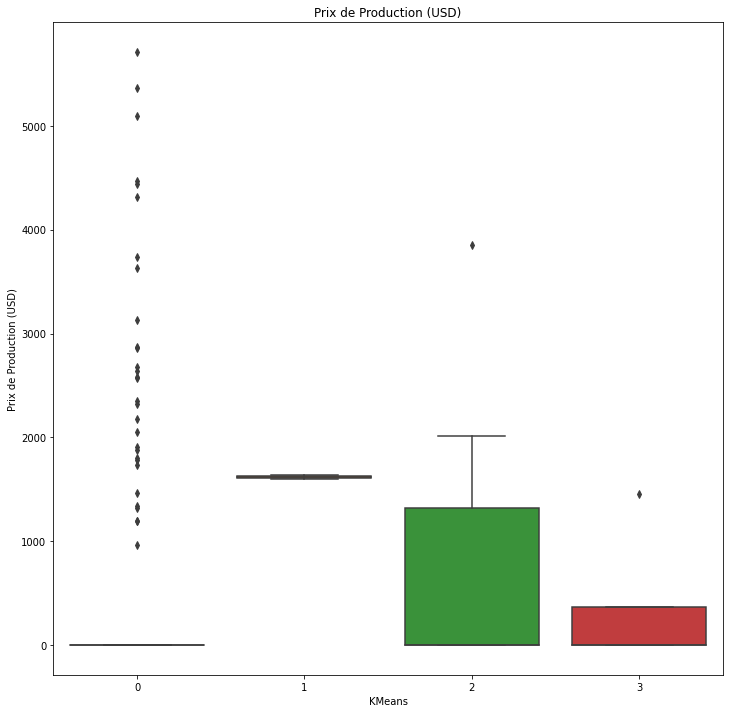

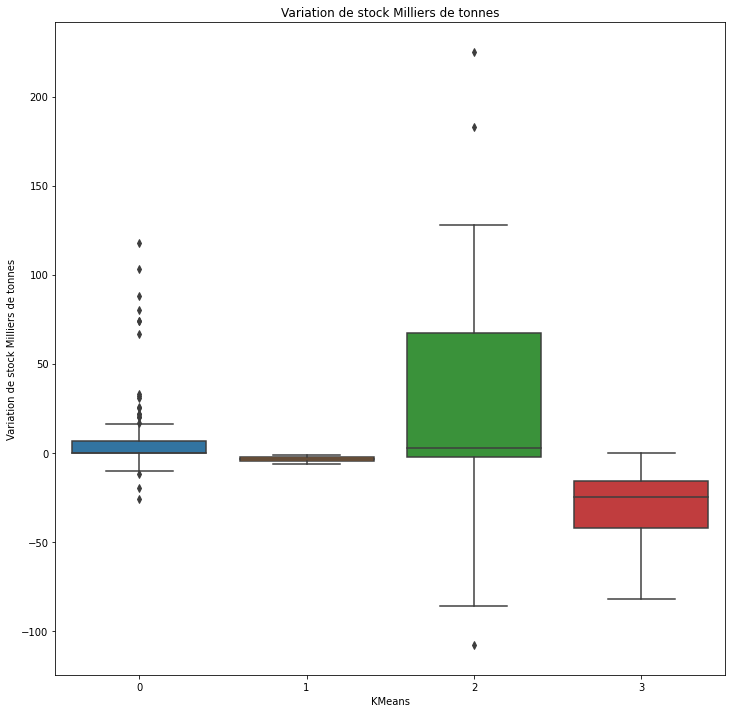

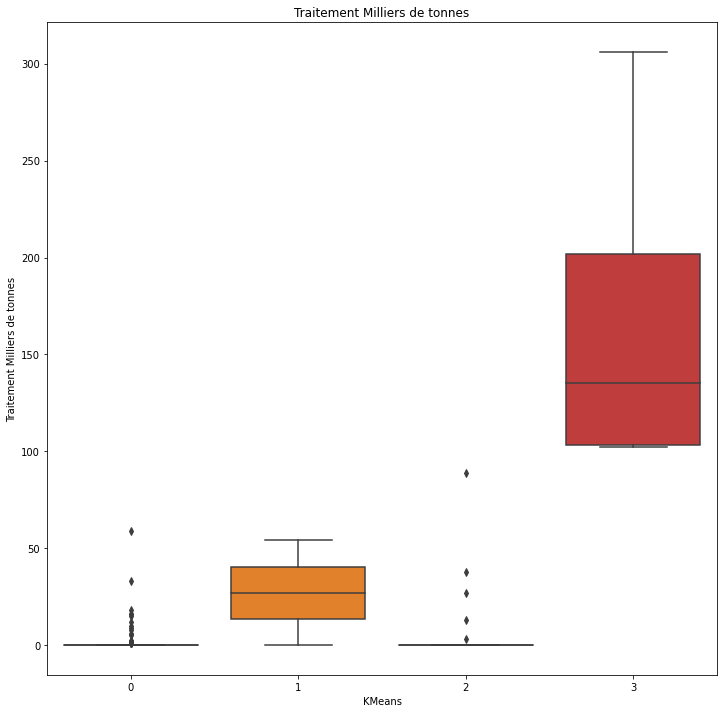

In [53]:
for i in range(len(variance.index.tolist())):
  plt.figure(figsize=(12,12))
  plt.title(variance.index[i])
  sns.boxplot(data=df, x=df.KMeans, y=variance.index[i])
  plt.savefig(f'p9/13 {variance.index[i]}.png')
  plt.show()

In [54]:
output = df_outlier
output["CAH"]= output["KMeans"] = 5
output = output.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 20]]

In [55]:
output.columns == df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [58]:
output = output.append(df)

In [61]:
output.to_csv("drive/MyDrive/p9/monteiro_valentin_p9_06_2022_data_v2.csv")